# Lab 4.1 Correcting Time Series Data

**Nikos Kordalis**

**Question 1: How has the time-space NDVI distribution over Rwanda changed? There are a few acceptable ways to answer this question – we leave it up to you to choose which one you find most interesting. You could, for example, fit a trend to the day of year of the peak NDVI for each pixel – this would tell you whether the peak NDVI is happening earlier or later in the year throughout the country. Another idea would be to look at changes in the median NDVI, which would tell you more about long-term greening trends. You are welcome to come up with your own metric, as long as you can explain why it is a useful way to analyze the data!**

**However you choose to answer this question, you must provide (1) a code snippet showing your method for analyzing each time series, (2) your reason for choosing to analyze NDVI changes with your method, (3) a map that shows the spatial distribution of your change metric, and (3) the interpretation of these changes. What might the changes represent? Are there any regions which stand out? (50 points)**

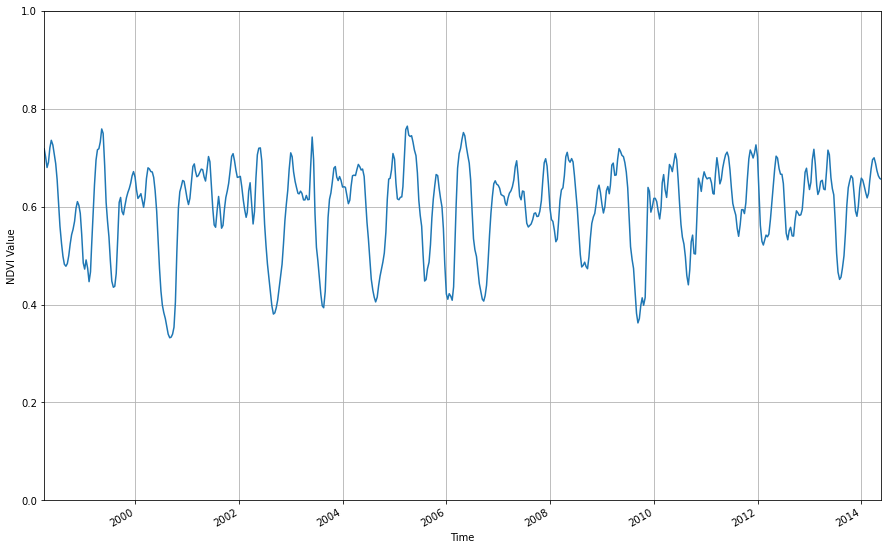

In [3]:
clean_fid = 'NDVI_S10_Rwanda_Clean.h5'
minX, maxX, minY, maxY = 28.5, 31, -3, -1
cs = 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]'
gt = [minX, 0.0089285714, 0, maxY, 0, -0.0089285714]

c2_ds = h5py.File(clean_fid, 'r')
data = c2_ds['ndvi_corr']
date = c2_ds['date'][:]
date = list(map(lambda x: fix_time_SPOT(x), date))
ts = pd.Series(data[150, 150, :], index=date)


plt.close('all')
f, ax = plt.subplots(1,figsize=(15,10))
ts.plot(figsize=(15,10))
ax.set_ylim(0, 1)
ax.set_ylabel('NDVI Value')
ax.set_xlabel('Time')
import datetime
ax.set_xlim(datetime.datetime(1998,4,1),datetime.datetime(2014,5,21))
ax.grid()

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
from Lab04_FX import fix_time_SPOT

**Yearly means**

In [4]:
def doy_mean_ndvi(ser):
    pn = ser.index[ser.values == np.nanmean(ser.values)]
    try:
        day_of_year = int(pn.strftime('%j')[0])
    except:
        day_of_year = -1
    #print(ser.index.year[0], np.nanmax(ser.values), day_of_year)
    return day_of_year

def mean_ndvi(s):
    ser = pd.Series(s, index=date)    
    yearly_mean = ser.groupby([ser.index.year]).apply(np.nanmean)
    yearly_mean_doy = ser.groupby([ser.index.year]).apply(doy_mean_ndvi)
    return [yearly_mean.values, yearly_mean_doy.values]

In [6]:
np_data = np.array(data)
mean_ndvi_grid = np.apply_along_axis(mean_ndvi, axis=2, arr=np_data)

/home/student/anaconda3/envs/BigData/lib/python3.7/site-packages/pandas/core/groupby/ops.py:206: RuntimeWarning: Mean of empty slice
  res = f(group)
/home/student/anaconda3/envs/BigData/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [169]:
yearly_mean_ndvi = mean_ndvi_grid[:,:,0,:].astype(float)

**Yearly variances**

In [53]:
def doy_var_ndvi(ser):
    pn = ser.index[ser.values == np.nanvar(ser.values)]
    try:
        day_of_year = int(pn.strftime('%j')[0])
    except:
        day_of_year = -1
    #print(ser.index.year[0], np.nanmax(ser.values), day_of_year)
    return day_of_year

def var_ndvi(s):
    ser = pd.Series(s, index=date)    
    yearly_var = ser.groupby([ser.index.year]).apply(np.var)
    yearly_var_doy = ser.groupby([ser.index.year]).apply(doy_var_ndvi)
    return [yearly_var.values, yearly_var_doy.values]

In [54]:
np_data = np.array(data)
var_ndvi_grid = np.apply_along_axis(var_ndvi, axis=2, arr=np_data)

/home/student/anaconda3/envs/BigData/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Degrees of freedom <= 0 for slice.
  


In [167]:
yearly_var_ndvi = var_ndvi_grid[:,:,0,:].astype(float)

**Plot**

In [115]:
def colorbar_cartopy(mappable, cmap, **kwargs):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.05, axes_class=plt.Axes, autoscale_on=False)
    obj = fig.colorbar(cmap, cax=cax, **kwargs)
    return obj

In [206]:
yearly_mean_ndvi.shape

(224, 280, 17)

In [211]:
yearly_var_ndvi.shape

(224, 280, 17)

/home/student/anaconda3/envs/BigData/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/home/student/anaconda3/envs/BigData/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/home/student/anaconda3/envs/BigData/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: All-NaN slice encountered


Text(0.5, 1.0, 'The maximums of the 17 annual variances at Rwanda')

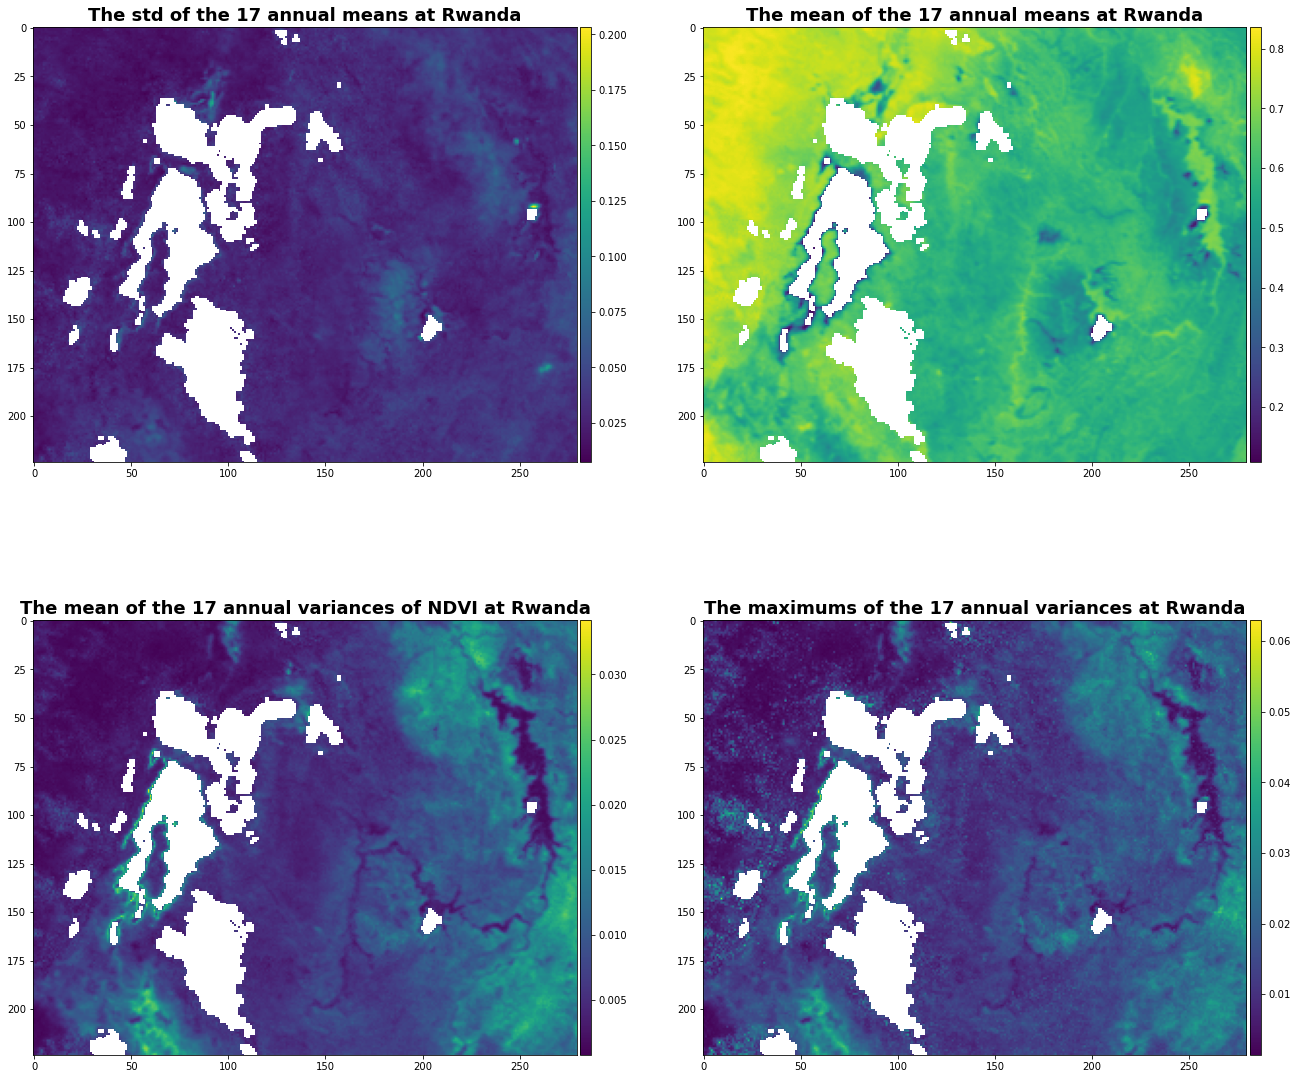

In [209]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(figsize=(22, 20))

ax1 = fig.add_subplot(221)
im1 = ax1.imshow(np.nanstd(yearly_mean_ndvi, 2)) 
cb = colorbar_cartopy(ax1, im1)
ax1.set_title('The std of the 17 annual means at Rwanda', fontweight="bold", size=18)

ax2 = fig.add_subplot(222)
im2 = ax2.imshow(np.nanmean(yearly_mean_ndvi, 2))
cb = colorbar_cartopy(ax2, im2)
ax2.set_title('The mean of the 17 annual means at Rwanda',fontweight="bold", size=18)

ax3 = fig.add_subplot(223)
im3=ax3.imshow(np.nanmean(yearly_var_ndvi, 2))
cb = colorbar_cartopy(ax3, img3)
ax3.set_title('The mean of the 17 annual variances of NDVI at Rwanda',fontweight="bold", size=18)


ax4 = fig.add_subplot(224)
im4 = ax4.imshow(np.nanmax(yearly_var_ndvi, 2)) 
cb = colorbar_cartopy(ax4, im4)
ax4.set_title('The maximums of the 17 annual variances at Rwanda',fontweight="bold", size=18)


Two approaches were carried out for the time-space NDVI distribution over Rwanda during the 17 years. In the first one, was calculated the annual means of the NDVI and then were plotted the standard deviation of all the 17 annual means and the final mean of the annual means of NDVI for each pixel. The plot of the standard deviation of the yearly means shows the deviations of each NDVI value (annual mean) from the average.

In the second approach the variances of each year were first calculated for each pixel. The variance presents how far all the values of the NDVI are from its average value. The third plot presents the mean of the variances that every pixel experienced during the 17 years while the fourth plot the maximums variances.  

Between the 2 methods I would choose the variance, especially if a sudden and crucial change in the value of the ndvi had to be investigated. The maximums of the variances that are depicted at the fourth plot could help to find significant changes in ndvi. Using the index of year or the "nanargmax" we could find out in which year these maximum variances correspond.Then a climate study of these years could explain whether the maximum variances are due to a local rather than a general factor that affects the whole area. For instance, if all the maximums variances of each pixel correspond to a specific year then we could search only for the climatic situation of that year and we would conlclude that the main reason of these variances is the response of the different kind of vegetation to the whether conditions. However, if maximum variations are observed in different years for each pixel then the conclusions are more complex. More factors than the wheather condition and the kind of vegetation have to be considered.